# DT CPU

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
#import parselmouth
from tqdm import tqdm
from scipy.stats import entropy
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv("/content/dysnet1.csv")

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import joblib

X = df.drop('label', axis=1)
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1,
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'DT_CPU.pkl')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


['SVC.pkl']

In [5]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     16180
           1       0.90      0.89      0.90     15932

    accuracy                           0.90     32112
   macro avg       0.90      0.90      0.90     32112
weighted avg       0.90      0.90      0.90     32112

[[14684  1496]
 [ 1688 14244]]


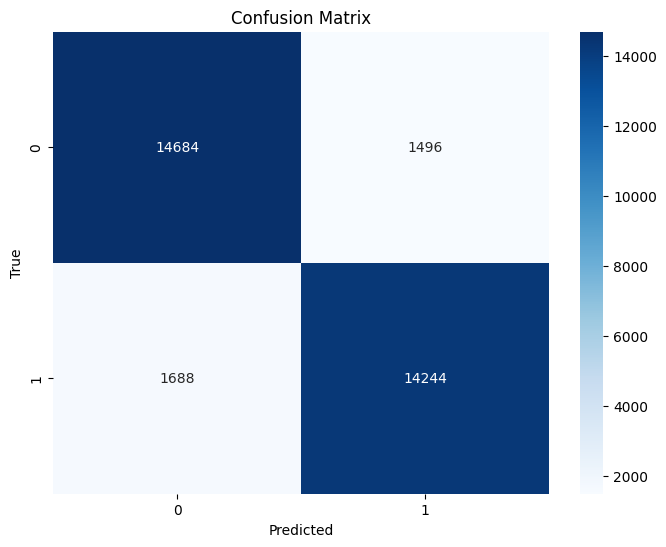

In [6]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()